<a href="https://colab.research.google.com/github/havigowda9625/AIML-DS-/blob/main/Medical_ppe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Dec  9 06:37:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Fbb7Z7BtUDBgjLYT1feX")
project = rf.workspace("cppe-nxmvw").project("medical-ppe-o6ot6")
version = project.version(3)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=4 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.235 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Medical-PPE-3/data.yaml, epochs=4, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed

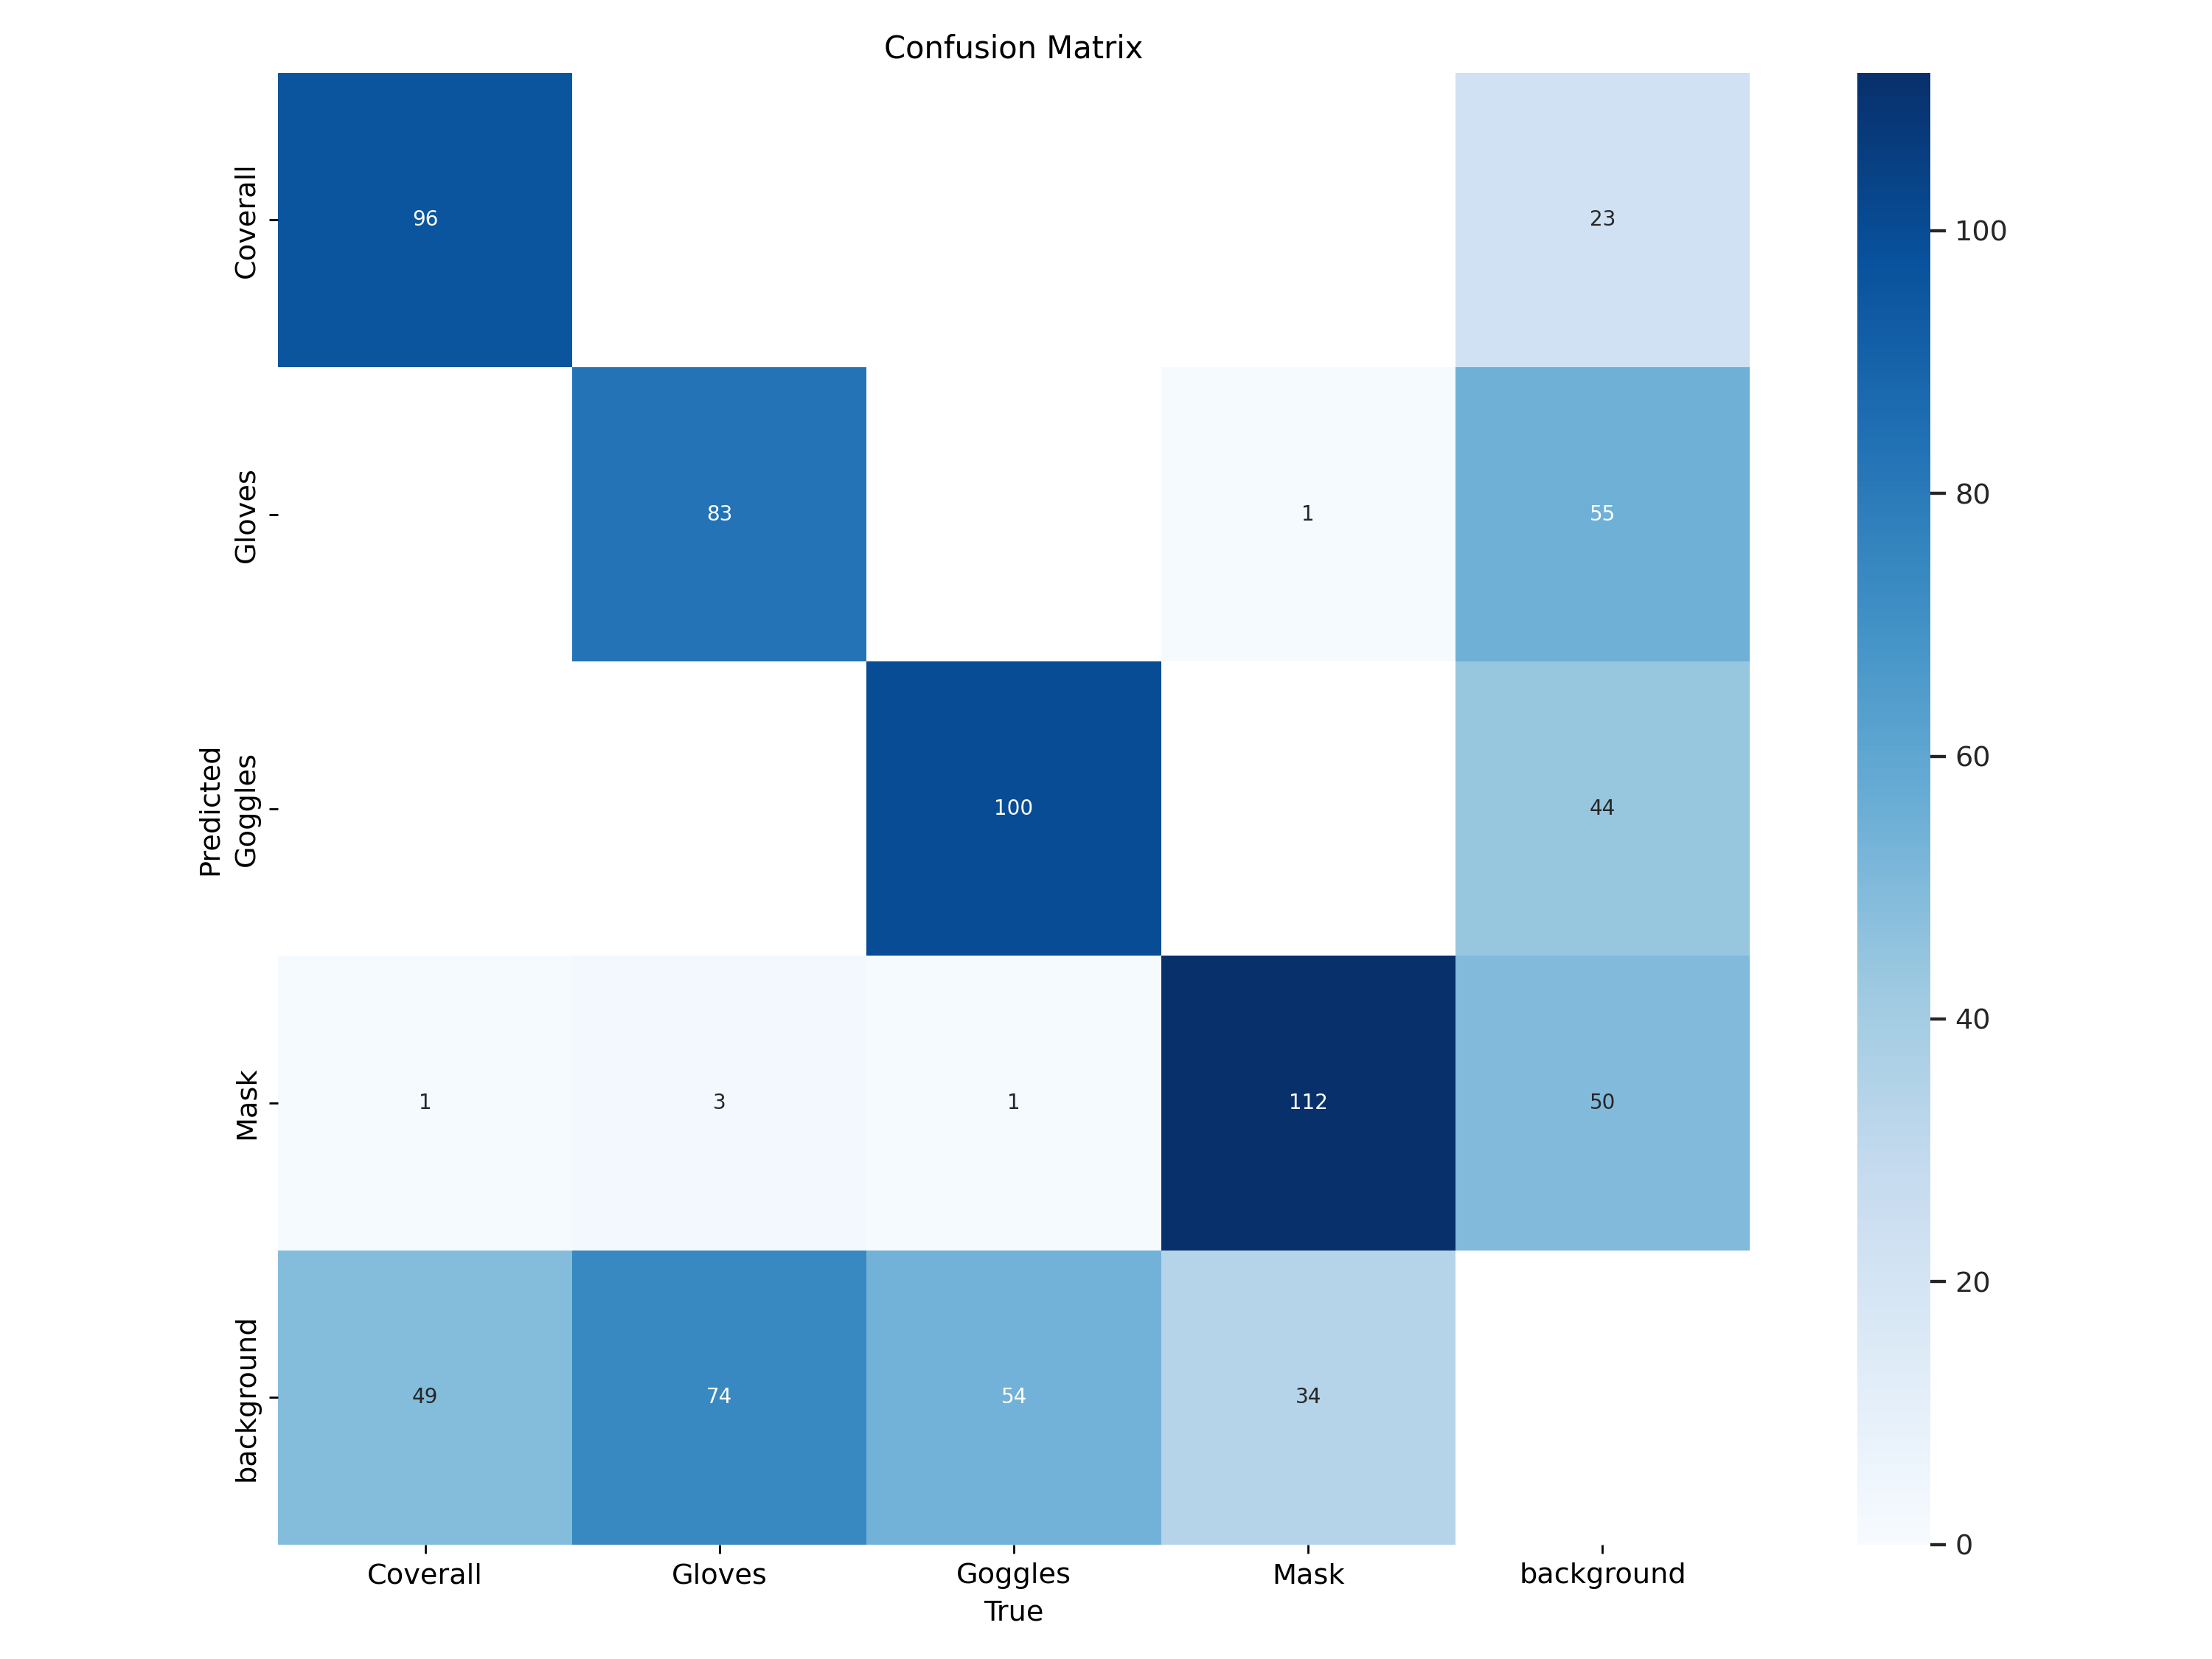

In [ ]:
correct_folder = "/content/runs/detect/train4"

from IPython.display import Image, display
display(Image(filename=f"{correct_folder}/confusion_matrix.png", width=600))


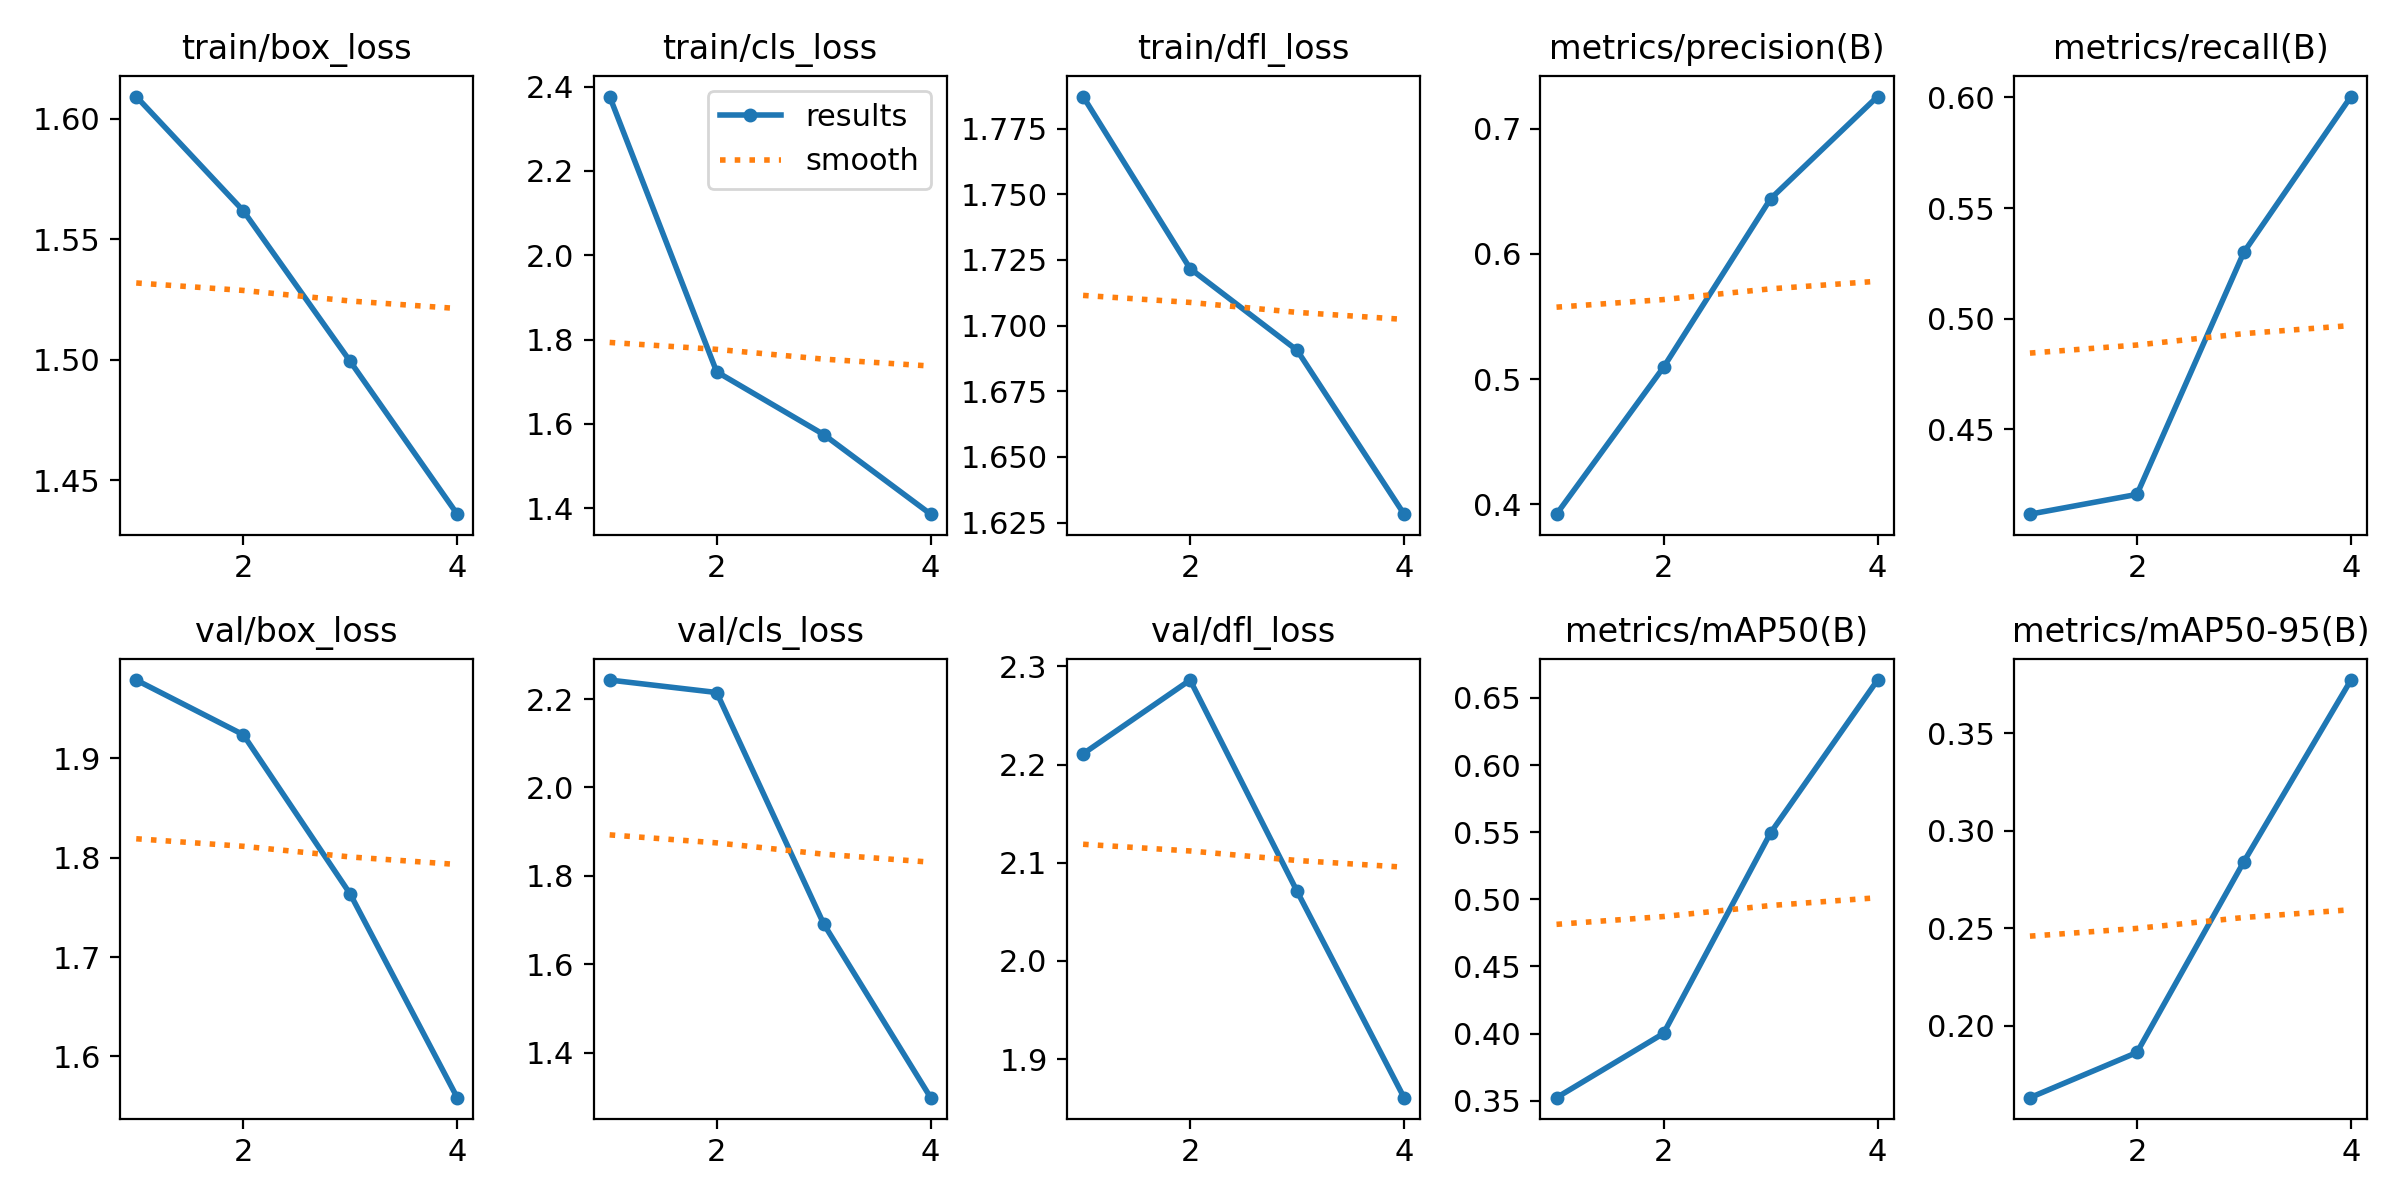

In [ ]:
display(Image(filename=f"{correct_folder}/results.png", width=600))


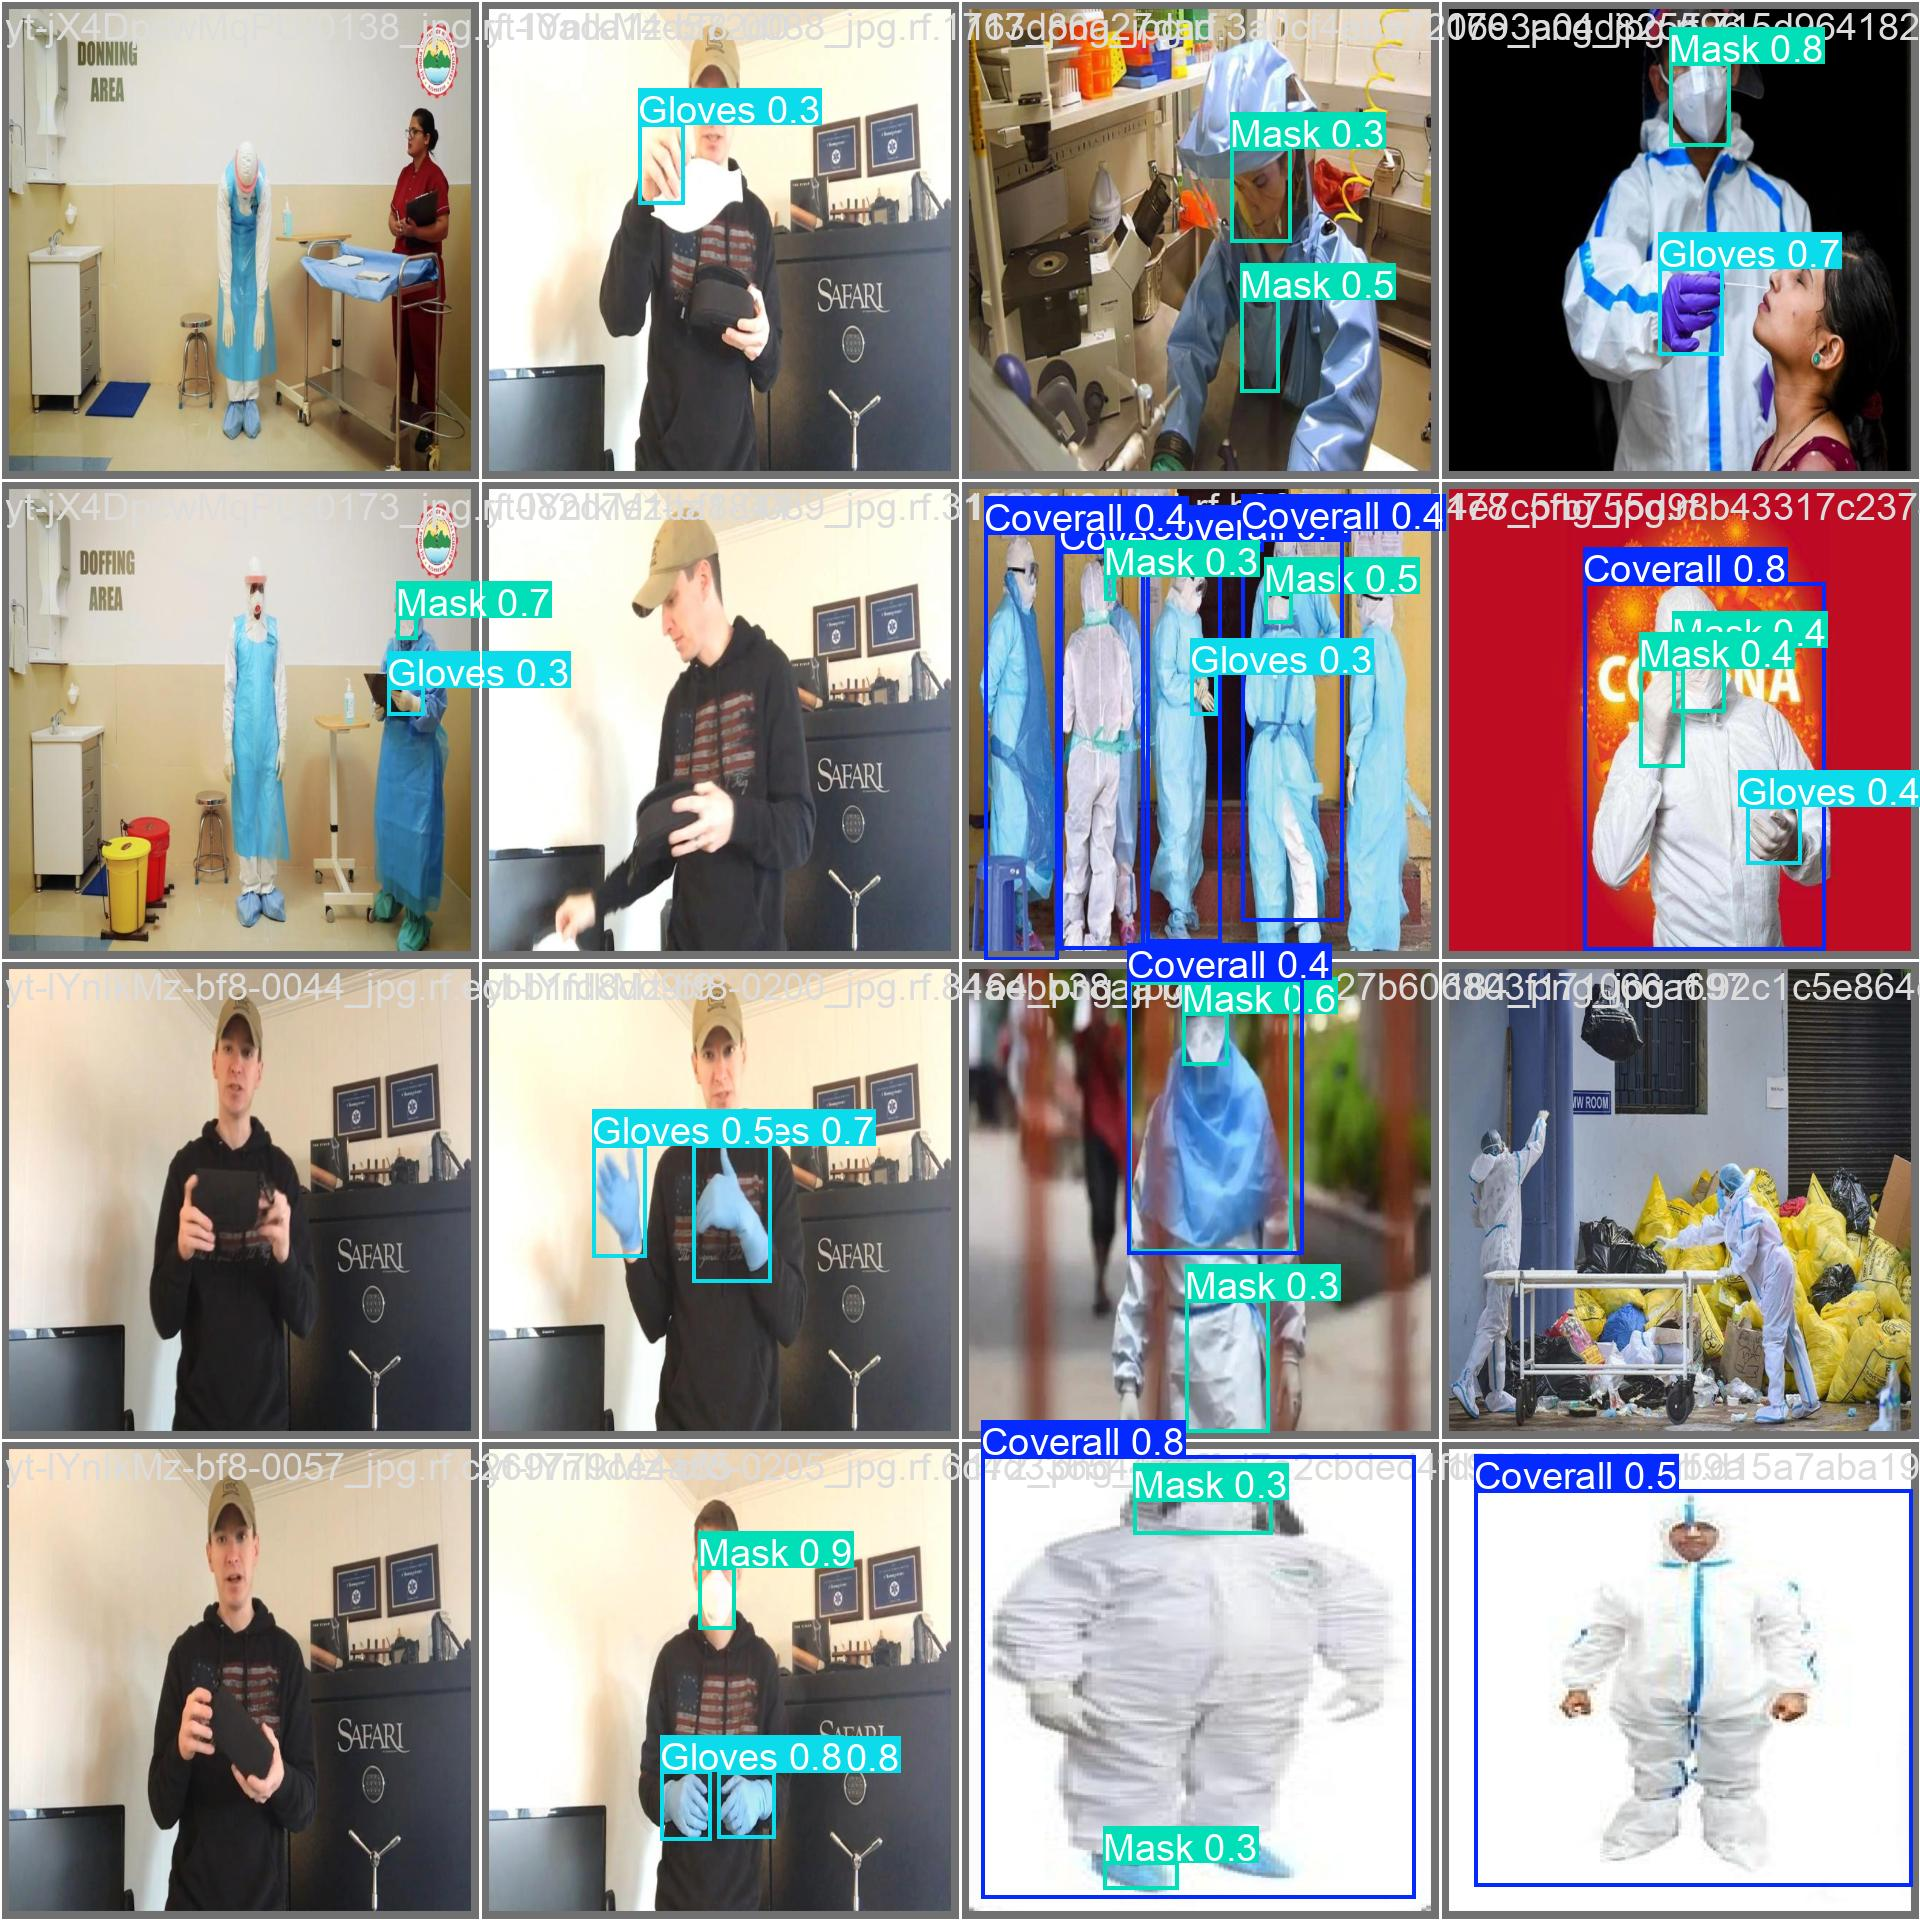

In [ ]:
display(Image(filename=f"{correct_folder}/val_batch0_pred.jpg", width=600))


In [ ]:
best_pt = "/content/runs/detect/train4/weights/best.pt"
last_pt = "/content/runs/detect/train4/weights/last.pt"

print("BEST MODEL :", best_pt)
print("LAST MODEL :", last_pt)


BEST MODEL : /content/runs/detect/train4/weights/best.pt
LAST MODEL : /content/runs/detect/train4/weights/last.pt


In [ ]:
!yolo task=detect mode=predict \
    model=/content/runs/detect/train4/weights/best.pt \
    source={dataset.location}/test/images \
    conf=0.25 save=True


Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/222 /content/datasets/Medical-PPE-3/test/images/103_png_jpg.rf.4d865157b53a4e6ed794237e33f0124d.jpg: 800x800 1 Gloves, 22.3ms
image 2/222 /content/datasets/Medical-PPE-3/test/images/105_png_jpg.rf.89aeead56736950dde0d073deeef66ae.jpg: 800x800 3 Masks, 22.3ms
image 3/222 /content/datasets/Medical-PPE-3/test/images/121_png_jpg.rf.64a0a72ac947ca9da49eb86f72a5943a.jpg: 800x800 2 Coveralls, 22.3ms
image 4/222 /content/datasets/Medical-PPE-3/test/images/160_png_jpg.rf.e5895224090a696864321efa70688b5a.jpg: 800x800 2 Coveralls, 2 Glovess, 22.2ms
image 5/222 /content/datasets/Medical-PPE-3/test/images/163_png_jpg.rf.6c21939ad7843ec05092ab7a2b75ffa4.jpg: 800x800 2 Coveralls, 2 Glovess, 2 Masks, 22.3ms
image 6/222 /content/datasets/Medical-PPE-3/test/images/17_png_jpg.rf.cc3d46199c73f00b4632539b0c7b2656.jpg: 800x800 1 C

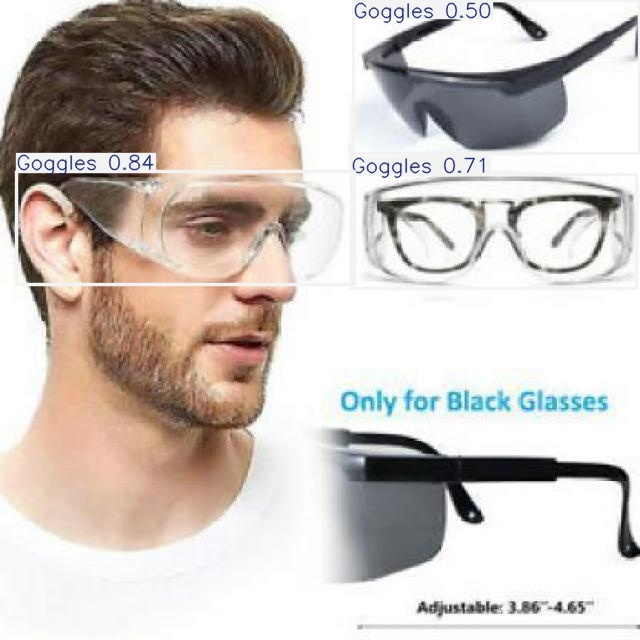

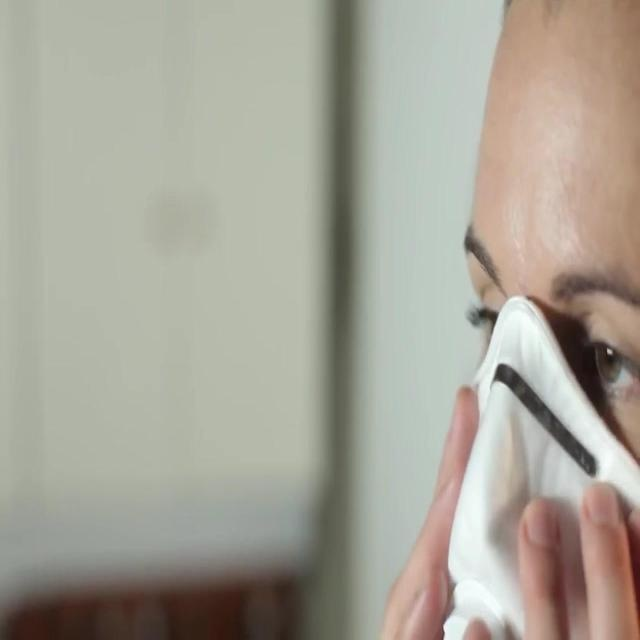

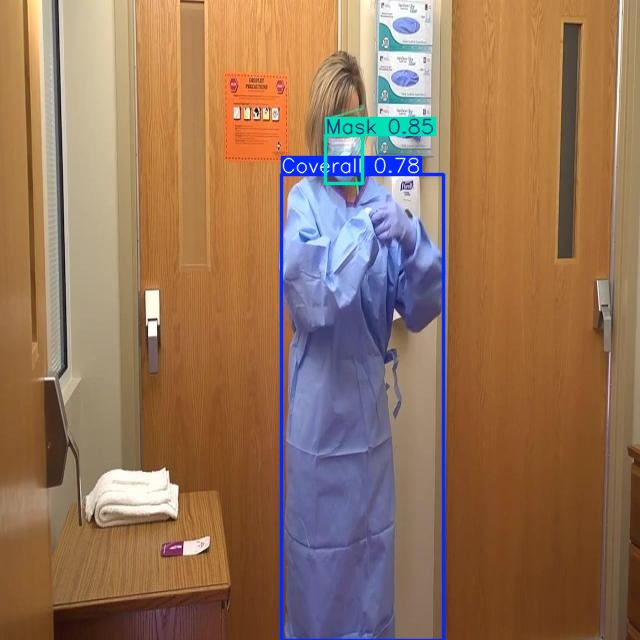

In [ ]:
import glob
from IPython.display import Image, display

pred_folder = "/content/runs/detect/predict"
pred_images = glob.glob(pred_folder + "/*.jpg")[:3]  # show first 3 results

for img in pred_images:
    display(Image(filename=img, width=600))
    print("\n")
